In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
display (os.getcwd())

'C:\\Users\\deepak'

In [3]:
os.chdir ('C:\Stock Price Prediction\\')
display (os.getcwd())

'C:\\Stock Price Prediction'

In [4]:
df =pd.read_csv("prices.csv", header=0)
display (df)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
print(df.shape)

(851264, 7)


In [6]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [7]:
df.symbol.value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [8]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [9]:
display(df.symbol.unique().shape)

(501,)

In [10]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [11]:
print(len(df.symbol.values))

851264


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [13]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [16]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [17]:
df.duplicated().sum()

0

In [18]:
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('securities.csv')
comp_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [19]:
comp_info["Ticker symbol"].nunique()

505

In [20]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [21]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [22]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [23]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [24]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [25]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [26]:
for i in comp_plot:
    print (i)

ADBE
FB
GS
MSFT
XRX
YHOO


In [27]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph

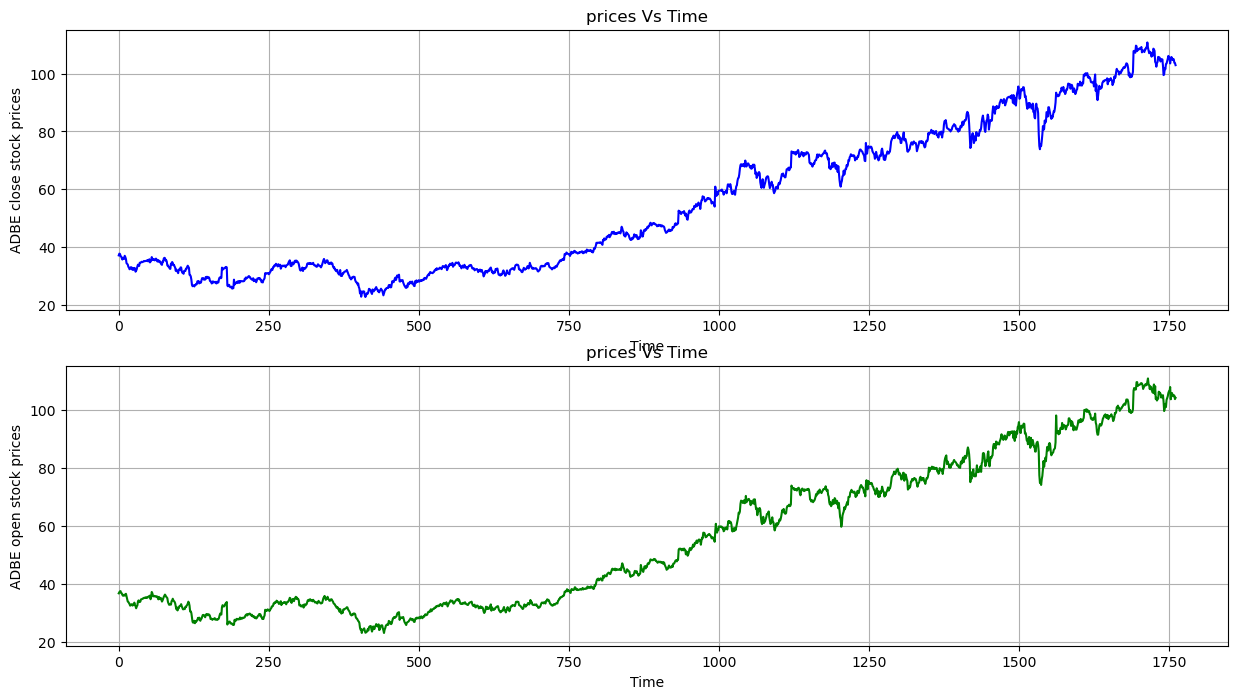

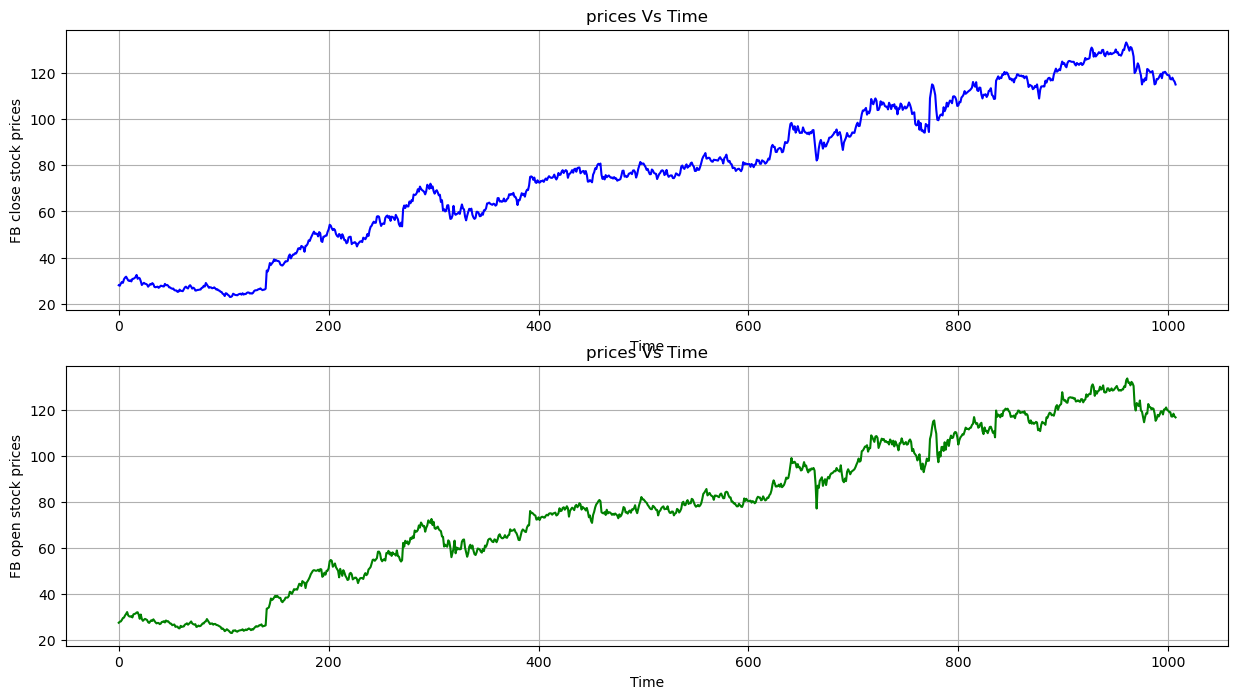

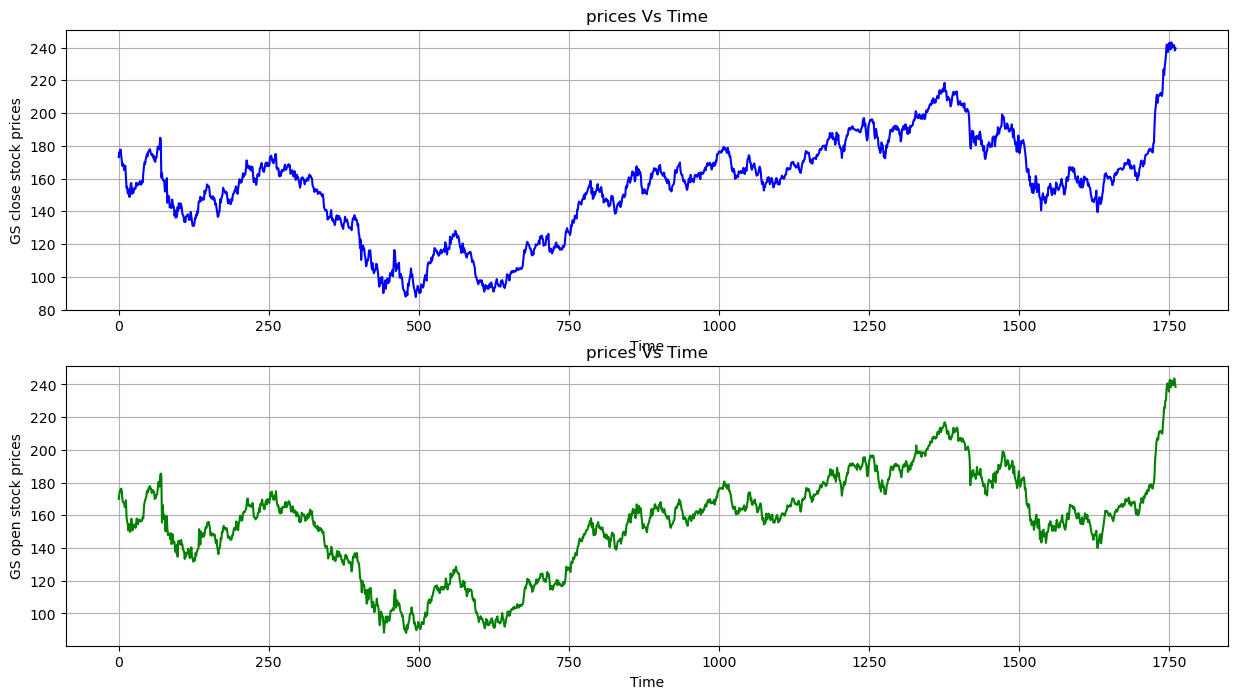

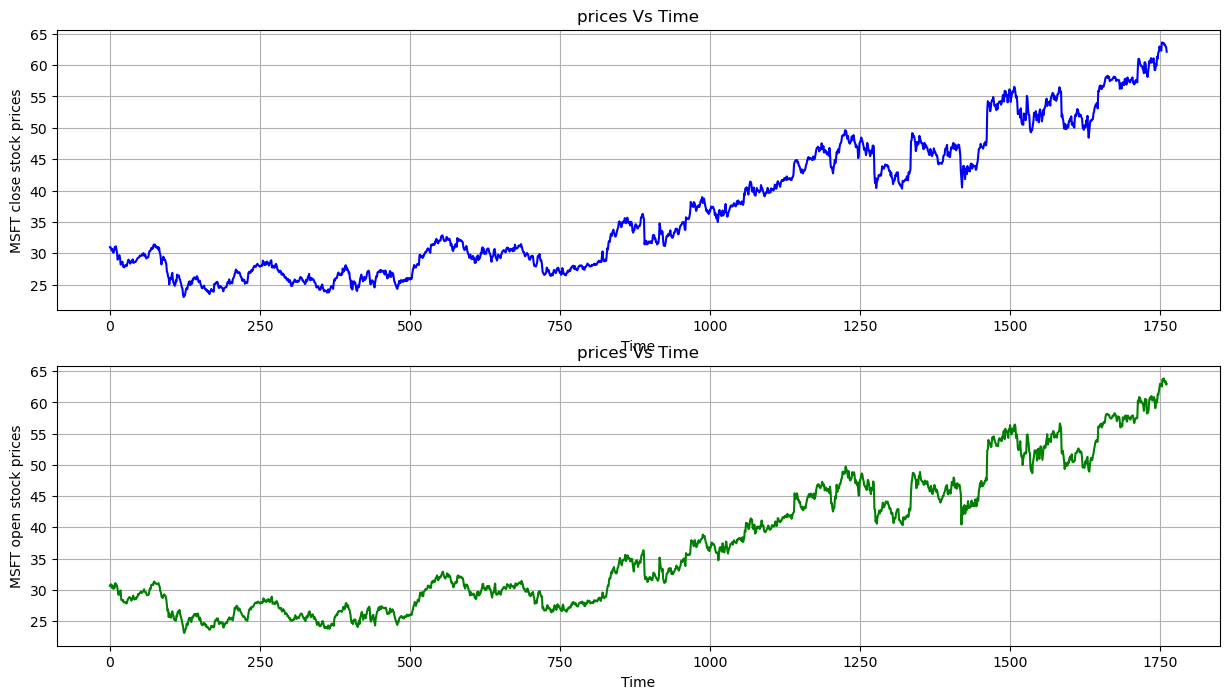

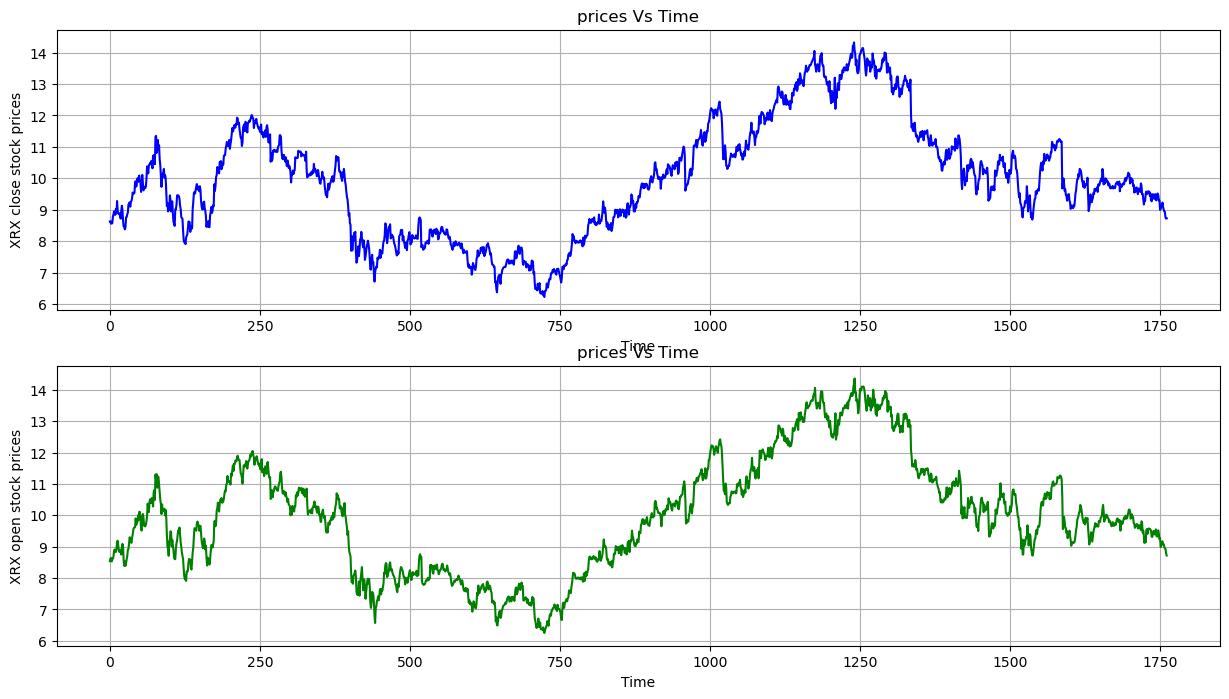

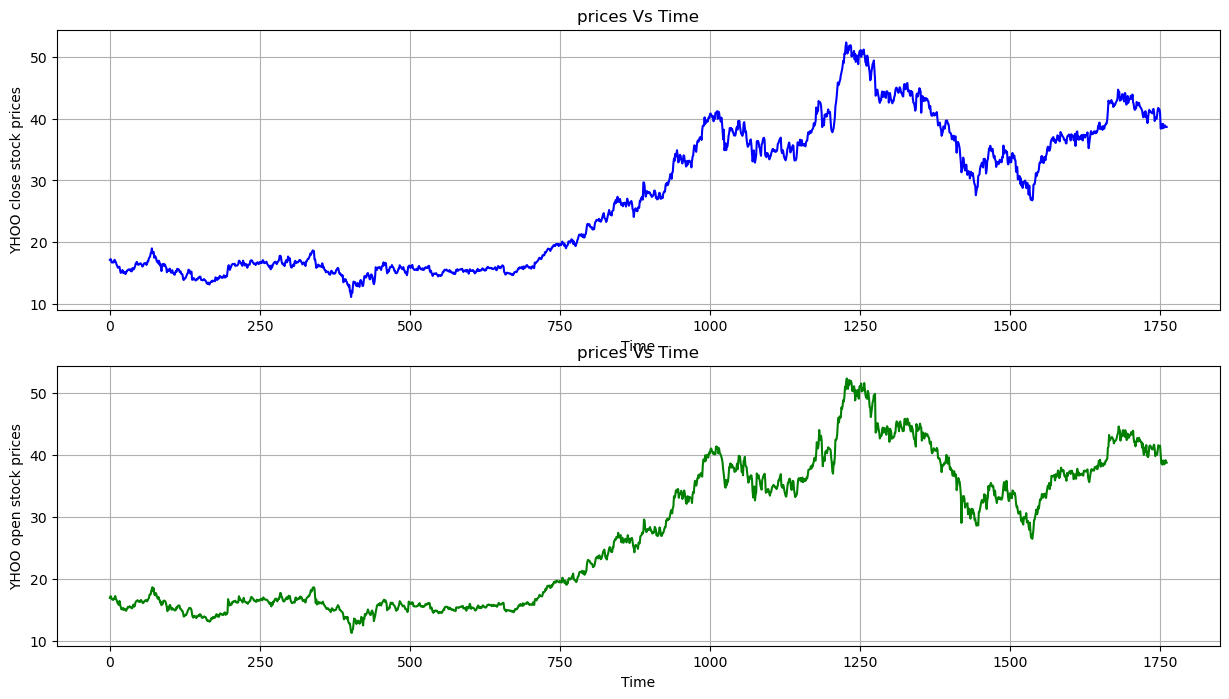

In [28]:
for i in comp_plot:
    plotter(i)

In [29]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)

[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [30]:
display (stocks.shape)

(1762,)

In [31]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)

(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [32]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [33]:
print (stocks.shape) 

(1762, 1)


In [34]:
train = int(len(stocks) * 0.80)
print (train)

1409


In [35]:
test = len(stocks) - train 
print (test)

353


In [36]:
train = stocks[0:train]
display (train.shape)
print(train)

(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [37]:
test = stocks[len(train) : ]
display(test.shape)
display (test)

(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [38]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array

In [39]:
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)

(1407, 2) (1407,)


In [40]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)

(351, 2) (351,)


In [41]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1760, 2) (1760,)


In [42]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [43]:
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [44]:
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)

(1407, 1, 2)

In [45]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)

(351, 1, 2)

In [46]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1760, 1, 2)

In [47]:
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from tensorflow.keras.models import Sequential 
# types of layers
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from tensorflow.keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [48]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [49]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741505 (2.83 MB)
Trainable params: 741505

In [50]:
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [51]:
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100



11/11 [==============================] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 1: val_loss improved from -inf to 0.01245, saving model to stock_weights1.hdf5
11/11 [==============================] - 8s 180ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0125 - val_mean_squared_error: 0.0125 - lr: 0.0010
Epoch 2/100
10/11 [==========================>...] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 2: val_loss improved from 0.01245 to 0.02262, saving model to stock_weights1.hdf5

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 [==============================] - 0s 34ms/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0226 - val_mean_squared_error: 0.0226 - lr: 0.0010
Epoch 3/100
10/11 [==========================>...] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 3: val_loss did not improve from 0.02262

Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514

In [52]:
test_pred = model.predict(testX)
display (test_pred [:10])

11/11 [==============================] - 1s 5ms/step


array([[0.5854388 ],
       [0.5572091 ],
       [0.5567654 ],
       [0.575034  ],
       [0.57674104],
       [0.57086396],
       [0.5612249 ],
       [0.54432803],
       [0.5205414 ],
       [0.49122703]], dtype=float32)

In [53]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])

array([[35.256912],
       [34.09159 ],
       [34.073273],
       [34.827404],
       [34.89787 ],
       [34.655262],
       [34.257362],
       [33.55986 ],
       [32.57795 ],
       [31.367851]], dtype=float32)

In [54]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])

array([[34.490002],
       [35.93    ],
       [36.240002],
       [36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ]])

In [55]:
from sklearn.metrics import r2_score
r2_score(testY,test_pred)

0.8756464223059671

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


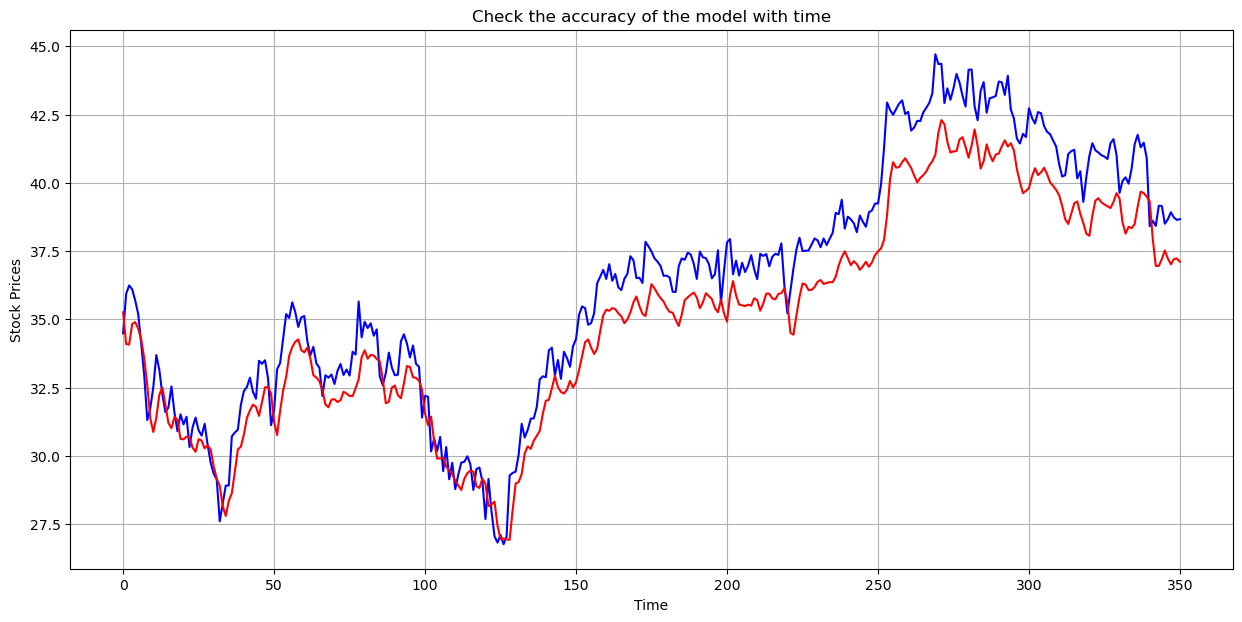

In [56]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [57]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

44/44 [==============================] - 0s 4ms/step
Display Accuracy Training Data


0.9741355278698863

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


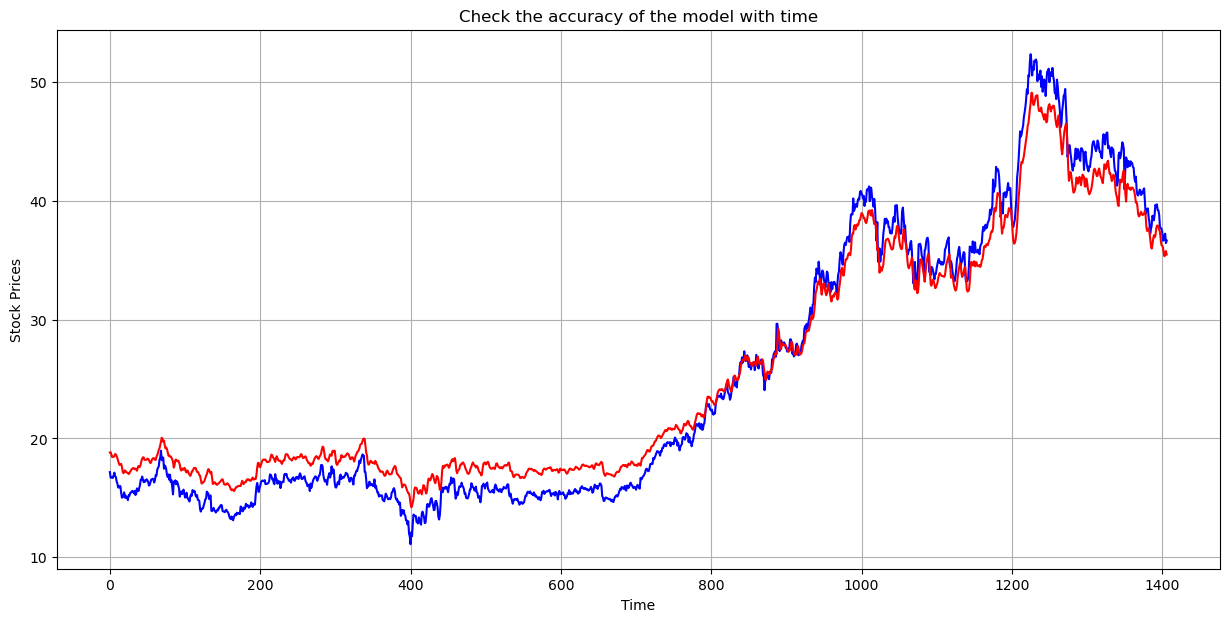

In [58]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [59]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

55/55 [==============================] - 0s 5ms/step
Display Accuracy Training Data


0.9752164372880298

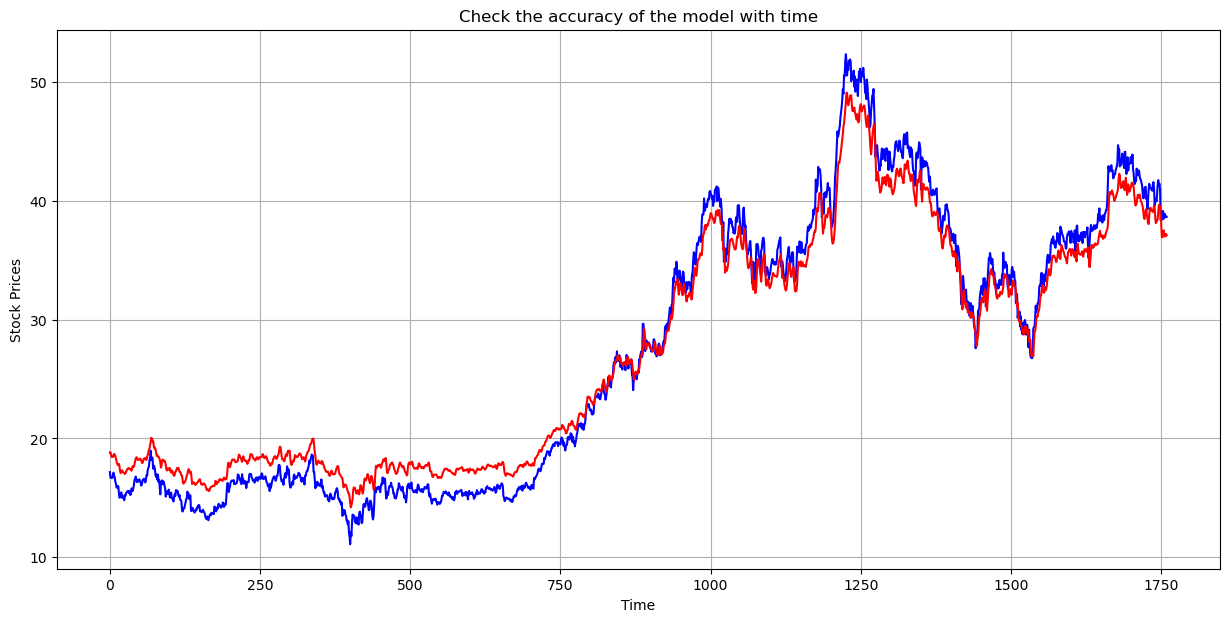

In [60]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [61]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_excel('results.xlsx')
display(results)

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,18.817673
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,18.844797
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,18.625504
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,18.437544
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,18.454140
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,37.224129
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,37.015270
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,37.201157
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,37.228111
